# Análise dos dados socioeconômicos e complementares dos discentes da UFRN

Primeiro iremos importar as bibliotecas/pacotes que iremos utilizar durante a execução desse notebook.

In [1]:
import re
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import numpy as np

Agora iremos criar uma variável chamada **dfs** que conterá os dataframes com os dados socioeconômicos e complementares dos discentes da UFRN.

In [2]:
def make_df(filenames):
    '''Pega uma lista de arquivos e retorna um único dataframe gerado.'''
    # Lista de dataframes
    dfs = [pd.read_csv('data/'+filename, sep=';') for filename in filenames]
    # Concatena todos os dataframes em um só
    return pd.concat(dfs, ignore_index=True)

# Arquivos da pasta de datasets
files = listdir('data')

# Filtro aplicado, lista de arquivos que satisfazem o regex
files_filter = {
    'socioeconomicos': list(filter(re.compile(r'dados-socio-economicos-20[0-9]{2}').search, files)),
    'ingressantes': list(filter(re.compile(r'discentes-20[0-9]{2}.csv').search, files))
}

# Variável com os dataframes que iremos usar
dfs = {
    'socioeconomicos': make_df(files_filter['socioeconomicos']),
    'complementares': pd.read_csv('data/dados-pessoais-discentes', sep=';'),
    'cursos': pd.read_csv('data/cursos-de-graduacao.csv', sep=';'),
    'ingressantes': make_df(files_filter['ingressantes']),
}

In [3]:
print(dfs['socioeconomicos'].info())
print(dfs['complementares'].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160366 entries, 0 to 160365
Data columns (total 9 columns):
id_discente                          160366 non-null object
ano                                  160366 non-null int64
periodo                              160366 non-null int64
renda                                92825 non-null float64
escola_ens_medio                     92825 non-null object
possui_bolsa_pesquisa                160366 non-null object
possui_auxilio_alimentacao           160366 non-null object
possui_auxilio_transporte            160366 non-null object
possui_auxilio_residencia_moradia    160366 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 12.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 372148 entries, 0 to 372147
Data columns (total 14 columns):
id_discente         372148 non-null object
sexo                372148 non-null object
data_nascimento     371427 non-null object
raca                372068 non-null object
es

## Análises
Iremos realizar as seguintes análises:
- Classes sociais por período de matrícula

### Classes sociais por período de matrícula
Para a elaboração da coluna **classe**, iremos utilizar a coluna de **renda** junto aos critérios de classificação econômica presente no site da [ABEP](http://www.abep.org/criterio-brasil).

In [3]:
# Limites de renda
bins = [0, 768, 1625, 2705, 4852, 9254, dfs['socioeconomicos']['renda'].max()]
# Criamos a coluna classe
dfs['socioeconomicos']['classe'] = pd.cut(
    dfs['socioeconomicos']['renda'], bins, 
    labels=["D", "C2", "C1", "B2", "B1", "A"], 
    include_lowest=True
)
# Ano periodo
dfs['socioeconomicos']['ano_periodo'] = dfs['socioeconomicos'].ano.astype(str).str.cat(
    dfs['socioeconomicos'].periodo.astype(str), sep='-'
)

In [4]:
dfs['socioeconomicos'].head()

,id_discente,ano,periodo,renda,escola_ens_medio,possui_bolsa_pesquisa,possui_auxilio_alimentacao,possui_auxilio_transporte,possui_auxilio_residencia_moradia,classe,ano_periodo
0,87e5ae2fd92fb8516564d09845d47c60,2016,2,1660.0,Todo em escola publica,f,f,f,f,C1,2016-2
1,bd2d84e1068a8b06fc93b2f3ced01e80,2016,2,2410.0,Todo em escola publica,f,t,f,f,C1,2016-2
2,84cbcaa9bd96f12b8bda89889898134a,2016,2,7000.0,Todo em escola publica,f,t,f,f,B1,2016-2
3,505b7a00af260788e13b66e21ad06f71,2016,2,5000.0,Todo em escola particular,f,f,f,f,B1,2016-2
4,0e0595fa516d0c30274d615212d43adb,2016,2,5000.0,Todo em escola particular,f,f,f,f,B1,2016-2


In [5]:
graph_classe = dfs['socioeconomicos'].groupby(['ano', 'periodo', 'classe'])['id_discente'].count()
#.plot(kind='line', ax=ax)

# Organizando dados para exibir gráficos
graph_classe = dfs['socioeconomicos'].filter(items=['ano_periodo', 'classe', 'id_discente'])
graph_classe = graph_classe.rename(index=str,columns={'id_discente':'count'})
graph_classe = graph_classe.pivot_table(index='ano_periodo', columns='classe', aggfunc='count')

In [6]:
graph_classe

count                                       
classe            D      C2      C1      B2      B1      A
ano_periodo                                               
2013-2          4.0     7.0     4.0     1.0     NaN    3.0
2014-1       2127.0  3466.0  1889.0  1442.0   850.0  746.0
2014-2       1991.0  3265.0  1718.0  1209.0   615.0  642.0
2015-1       1940.0  4035.0  1978.0  1406.0   812.0  736.0
2015-2       1573.0  4097.0  1943.0  1458.0   821.0  738.0
2016-1       1540.0  4545.0  2274.0  1523.0   842.0  829.0
2016-2       1319.0  5071.0  2928.0  2143.0  1300.0  906.0
2017-1       1347.0  5475.0  2901.0  2098.0  1091.0  986.0
2017-2       1114.0  4669.0  2519.0  1773.0   898.0  738.0
2018-1         51.0   217.0    99.0    66.0    27.0   20.0

In [18]:
graph_classe.columns

MultiIndex(levels=[['count'], ['D', 'C2', 'C1', 'B2', 'B1', 'A']],
           labels=[[0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5]],
           names=[None, 'classe'])

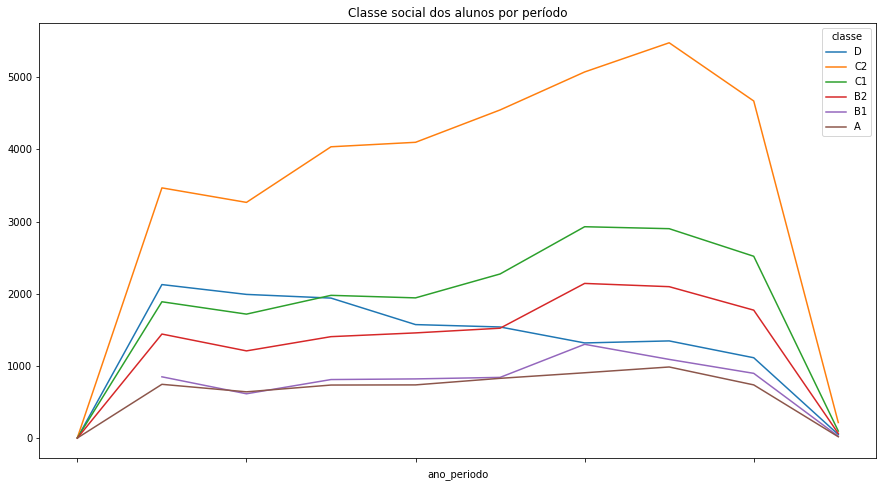

In [162]:
# Limpa os dados de 2013-2 e 2018-1

# Dados dos gráficos
fig, ax = plt.subplots(figsize=(15,8))
plt.title("Classe social dos alunos por período")

# Exibir gráficos
graph_classe['count'].plot(kind='line', ax=ax)

In [ ]:
# No decorrer dos anos, a quantidade dos alunos que recebem bbolsas aumentou ou não

In [217]:

dfs['bolsas'] = dfs['socioeconomicos'].filter(items=['possui_auxilio_alimentacao','possui_auxilio_transporte','possui_auxilio_residencia_moradia','id_discente', 'ano_periodo'])



dfs['bolsas']

,possui_auxilio_alimentacao,possui_auxilio_transporte,possui_auxilio_residencia_moradia,id_discente,ano_periodo
0,f,f,f,87e5ae2fd92fb8516564d09845d47c60,2016-2
1,t,f,f,bd2d84e1068a8b06fc93b2f3ced01e80,2016-2
2,t,f,f,84cbcaa9bd96f12b8bda89889898134a,2016-2
3,f,f,f,505b7a00af260788e13b66e21ad06f71,2016-2
4,f,f,f,0e0595fa516d0c30274d615212d43adb,2016-2
5,t,f,f,206da1cb19f7200512d2547c6739c431,2016-2
6,t,f,t,4402f41efd8b2de8bd404bf6cdce34ef,2016-2
7,f,f,f,8f2564632827b96b41a7e80767dd9911,2016-2
8,f,f,f,30409162b0092cbaf0f4f74d8623cbf0,2016-2
9,t,f,t,481ea7006a4b40d05d0c3e67f91e662d,2016-2


In [ ]:

graph_bolsa_pesquisa = dfs['bolsa_pesquisa'].filter(items=['possui_bolsa_pesquisa', 'ano_periodo', 'id_discente'])
graph_bolsa_pesquisa = graph_bolsa_pesquisa.rename(index=str,columns={'id_discente':'count'})
graph_bolsa_pesquisa = graph_bolsa_pesquisa.pivot_table(index='ano_periodo', columns='possui_bolsa_pesquisa', aggfunc='count')

# Dados dos gráficos
fig, ax = plt.subplots(figsize=(15,8))
plt.title("Alunos com Bolsa de Pesquisa")

# Exibir gráficos
graph_bolsa_pesquisa['count'].plot(kind='bar', ax=ax)


In [189]:
dfs['socioeconomicos'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160366 entries, 0 to 160365
Data columns (total 11 columns):
id_discente                          160366 non-null object
ano                                  160366 non-null int64
periodo                              160366 non-null int64
renda                                92825 non-null float64
escola_ens_medio                     92825 non-null object
possui_bolsa_pesquisa                160366 non-null object
possui_auxilio_alimentacao           160366 non-null object
possui_auxilio_transporte            160366 non-null object
possui_auxilio_residencia_moradia    160366 non-null object
classe                               92825 non-null category
ano_periodo                          160366 non-null object
dtypes: category(1), float64(1), int64(2), object(7)
memory usage: 12.4+ MB


In [91]:
dfs['merge'] = pd.merge(dfs['complementares'], dfs['socioeconomicos'], on='id_discente')

In [92]:
df_merge = dfs['merge']

# Pega as entradas com data de nascimento preenchidas corretamente
df_merge_filter = df_merge[np.logical_and(~df_merge['data_nascimento'].isnull(), df_merge['data_nascimento'].map(
    lambda x: len(str(x)) > 9
))]

# Criamos a coluna ano_nascimento com qual o ano que o individuo nasceu
df_merge_filter['idade_ingresso'] = df_merge_filter['ano_ingresso'] - df_merge_filter['data_nascimento'].map(
    lambda x: int(str(x)[6:])
)

df_merge_filter.head()

/home/srta_chagas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,id_discente,sexo,data_nascimento,raca,estado_origem,cidade_origem,estado,municipio,bairro,nivel_ensino,...,periodo,renda,escola_ens_medio,possui_bolsa_pesquisa,possui_auxilio_alimentacao,possui_auxilio_transporte,possui_auxilio_residencia_moradia,classe,ano_periodo,idade_ingresso
0,a2f469455a1226eca9d652d02ade7e4d,M,03-12-1983,Pardo,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,PLANALTO,GRADUAÇÃO,...,1,NaN,NaN,f,f,f,f,NaN,2012-1,18
1,1cc536cdf93a5d423ca2f6da29c75eb5,F,26-01-1977,Pardo,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,PITIMBU,GRADUAÇÃO,...,2,NaN,NaN,f,f,f,f,NaN,2010-2,25
2,ebe7eee3d3265baf1cb547335d58a1eb,M,29-11-1980,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,PONTA NEGRA,GRADUAÇÃO,...,1,NaN,NaN,f,f,f,f,NaN,2011-1,22
3,ebe7eee3d3265baf1cb547335d58a1eb,M,29-11-1980,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,PONTA NEGRA,GRADUAÇÃO,...,2,NaN,NaN,f,f,f,f,NaN,2010-2,22
4,ebe7eee3d3265baf1cb547335d58a1eb,M,29-11-1980,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,PONTA NEGRA,GRADUAÇÃO,...,1,NaN,NaN,f,f,f,f,NaN,2012-1,22


In [165]:
# Define some age's intervals
bins = [0, 15, 20, 25, 30, 35, 40, 45, 50, df_merge_filter['idade_ingresso'].max()]

df_merge_filter['intervalo_idade'] = pd.cut(
    df_merge_filter['idade_ingresso'], bins, 
    labels=["< 15", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50 >="], 
    include_lowest=True
)

/home/srta_chagas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [166]:
# Organizando dados para exibir gráficos
df_merge_graph = df_merge_filter[np.logical_and(df_merge_filter['ano_ingresso'] >= 2010, df_merge_filter['ano_ingresso'] < 2018)]

# Organizando dados para exibir gráficos
graph_idade_ingresso = df_merge_graph.filter(items=['ano_ingresso', 'intervalo_idade', 'id_discente'])
graph_idade_ingresso = graph_idade_ingresso.rename(index=str,columns={'id_discente':'count'})
graph_idade_ingresso = graph_idade_ingresso.pivot_table(index='ano_ingresso', columns='intervalo_idade', aggfunc='count')

In [167]:
graph_idade_ingresso

count                                                 
intervalo_idade  < 15  15-19 20-24 25-29 30-34 35-39 40-44 45-49 50 >=
ano_ingresso                                                          
2010                9  10337  4721  1030   282    88    62    32    14
2011                9  11709  5123  1382   451   185    73    36    31
2012               14  12262  5258  1352   520   182    79    41    24
2013               30  10455  4553  1362   533   187    63    55    19
2014              113  10603  4510  1959   685   264   134    69    57
2015              168   9649  5199  1853   676   273   141    80    46
2016              164   7965  5103  1910   671   313   132    74    40
2017              116   4085  2922  1021   419   152    74    55    17

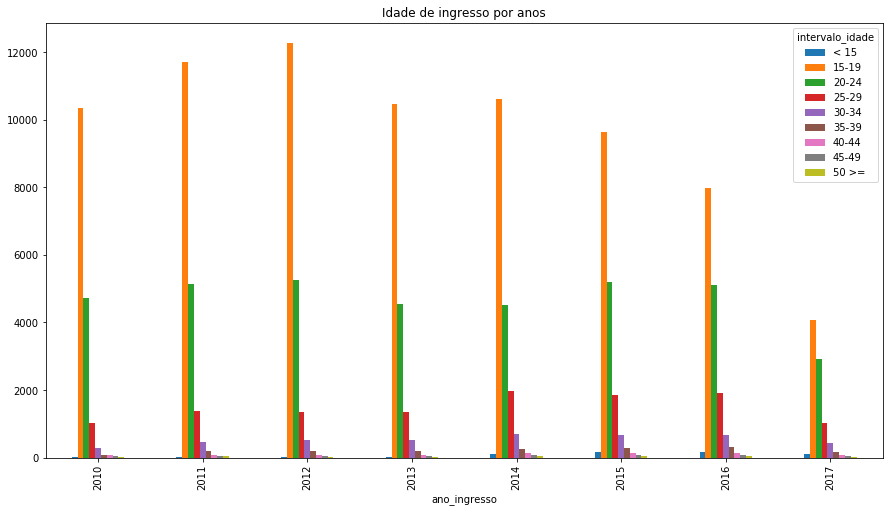

In [168]:
# Dados dos gráficos
fig, ax = plt.subplots(figsize=(15,8))
plt.title("Idade de ingresso por anos")

# Exibir gráficos
graph_idade_ingresso['count'].plot(kind='bar', ax=ax)

In [ ]:
# Análise de ingressos por áreas de conhecimento

In [99]:

# Retira os NAN
dfs['cursos_filter'] = dfs['cursos'][~dfs['cursos']['id_curso'].isnull()]
dfs['ingressantes_filter'] = dfs['ingressantes'][~dfs['ingressantes']['id_curso'].isnull()]

# Configura o mesmo tipo para os 'id_curso'
ingressantes_filter['id_curso'] = dfs['ingressantes_filter']['id_curso'].astype(int)

# Merge entre as duas tabelas
dfs['merge_curso_ingressantes'] = pd.merge(dfs['ingressantes_filter'], dfs['cursos_filter'], on='id_curso')

/home/srta_chagas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [100]:
df_merge_ci = dfs['merge_curso_ingressantes']


# Contar ocorrências por área de conhecimento e montar um gráfico
graph_area_conhecimento = df_merge_ci.filter(items=['area_conhecimento','ano_ingresso', 'matricula'])
graph_area_conhecimento = graph_area_conhecimento.rename(index=str,columns={'matricula':'count'})
graph_area_conhecimento = graph_area_conhecimento.pivot_table(index='ano_ingresso', columns='area_conhecimento', aggfunc='count')



In [101]:
graph_area_conhecimento

count                      \
area_conhecimento Ciências Agrárias Ciências Biológicas   
ano_ingresso                                              
2009                           92.0               596.0   
2010                           94.0               596.0   
2012                           74.0               775.0   
2013                           91.0               429.0   
2014                           87.0               485.0   
2015                           78.0               337.0   
2016                           86.0               350.0   
2017                           87.0               493.0   
2018                           87.0               354.0   

                                                               \
area_conhecimento Ciências Exatas e da Terra Ciências Humanas   
ano_ingresso                                                    
2009                                  1677.0           1212.0   
2010                                  2669.0           1256.0   
2012                                  2528.0           1358.0   
2013                                  2438.0           1040.0   
2014                                  2631.0           1328.0   
2015                                  2279.0            858.0   
2016                                  2462.0            911.0   
2017                                  2835.0           1189.0   
2018                                  2453.0            948.0   

                                                                            \
area_conhecimento Ciências Sociais Aplicadas Ciências da Saúde Engenharias   
ano_ingresso                                                                 
2009                                  1282.0             839.0       732.0   
2010                                  1697.0             914.0       634.0   
2012                                  1437.0            1616.0       674.0   
2013                                  1483.0            1146.0       789.0   
2014                                  1577.0            1153.0       839.0   
2015                                  1401.0            1071.0       921.0   
2016                                  1547.0            1154.0       983.0   
2017                                  1652.0            1215.0      1040.0   
2018                                  1475.0            1150.0      1022.0   

                                                     
area_conhecimento Linguística, Letras e Artes Outra  
ano_ingresso                                         
2009                                    310.0   NaN  
2010                                    320.0   NaN  
2012                                   1257.0   NaN  
2013                                    435.0  28.0  
2014                                    865.0  28.0  
2015                                    439.0  30.0  
2016                                    496.0  35.0  
2017                                    836.0  27.0  
2018                                    554.0  35.0

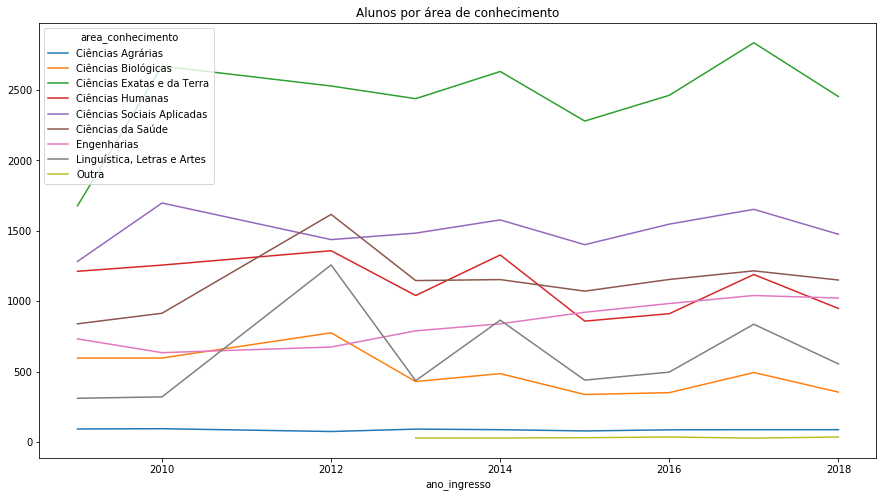

In [172]:
# Dados dos gráficos
fig, ax = plt.subplots(figsize=(15,8))
plt.title("Alunos por área de conhecimento")

# Exibir gráficos
graph_area_conhecimento['count'].plot(kind='line', ax=ax)

In [114]:
# Análise de cursos por área de conhecimento

In [150]:
#crescimento dos cursos por data de funcionamento

graph_cursos_area_conhecimento = dfs['cursos_filter'].filter(items=['area_conhecimento','data_funcionamento','situacao_curso', 'id_curso'])

# Retira os que não tem data de funcionamento e que são incoerentes
graph_cursos_area_conhecimento = graph_cursos_area_conhecimento[np.logical_and(~graph_cursos_area_conhecimento['data_funcionamento'].isnull(),
                                                                                graph_cursos_area_conhecimento['data_funcionamento'].map(
                                                                                    lambda x: len(str(x)) > 9
                                                                                ) )]

# Transforma data de funcionamento para ano_fundacao
graph_cursos_area_conhecimento['ano_fundacao'] = graph_cursos_area_conhecimento['data_funcionamento'].map(
    lambda x: int(str(x)[0:4])
)
# Retira os desativos
graph_cursos_area_conhecimento = graph_cursos_area_conhecimento[graph_cursos_area_conhecimento['situacao_curso'].map(
    lambda x: x == "ATIVO"
)]
graph_cursos_area_conhecimento.head()


,area_conhecimento,data_funcionamento,situacao_curso,id_curso,ano_fundacao
0,Ciências Sociais Aplicadas,1971-09-16,ATIVO,2000002,1971
3,Engenharias,1973-08-13,ATIVO,2000005,1973
4,"Linguística, Letras e Artes",1977-03-03,ATIVO,2000123,1977
5,Ciências Sociais Aplicadas,1977-03-03,ATIVO,2000006,1977
6,Ciências Biológicas,2003-03-31,ATIVO,2000122,2003


In [155]:

bins = [graph_cursos_area_conhecimento['ano_fundacao'].min(), 1933, 1943, 1953, 1963, 1973, 1983, 1993, 2003, 2013, 2023]

graph_cursos_area_conhecimento['intervalo_fundacao'] = pd.cut(
    graph_cursos_area_conhecimento['ano_fundacao'], bins, 
    labels=["< 1933", "1933-1943", "1943-1953", "1953-1963", "1963-1973", "1973-1983", "1983-1993", "1993-2003", "2003-2013", "2013-2023"], 
    include_lowest=True
)



In [156]:

# Contar ocorrências por área de conhecimento e montar um gráfico
graph_cac = graph_cursos_area_conhecimento.filter(items=['area_conhecimento','intervalo_fundacao', 'id_curso'])
graph_cac = graph_cac.rename(index=str,columns={'id_curso':'count'})
graph_cac = graph_cac.pivot_table(index='intervalo_fundacao', columns='area_conhecimento', aggfunc='count')


In [157]:
graph_cac

count                             \
area_conhecimento  Ciências Biológicas Ciências Exatas e da Terra   
intervalo_fundacao                                                  
< 1933                             NaN                        NaN   
1943-1953                          NaN                        NaN   
1953-1963                          NaN                        2.0   
1963-1973                          2.0                        7.0   
1973-1983                          NaN                        3.0   
1983-1993                          NaN                        1.0   
1993-2003                          2.0                        NaN   
2003-2013                          NaN                        2.0   
2013-2023                          NaN                        2.0   

                                                                \
area_conhecimento  Ciências Humanas Ciências Sociais Aplicadas   
intervalo_fundacao                                               
< 1933                          NaN                        NaN   
1943-1953                       NaN                        1.0   
1953-1963                       3.0                        2.0   
1963-1973                       NaN                        2.0   
1973-1983                       6.0                        4.0   
1983-1993                       NaN                        NaN   
1993-2003                       1.0                        1.0   
2003-2013                       1.0                        NaN   
2013-2023                       NaN                        2.0   

                                                                              
area_conhecimento  Ciências da Saúde Engenharias Linguística, Letras e Artes  
intervalo_fundacao                                                            
< 1933                           1.0         NaN                         NaN  
1943-1953                        1.0         NaN                         NaN  
1953-1963                        1.0         1.0                         NaN  
1963-1973                        2.0         2.0                         NaN  
1973-1983                        3.0         2.0                         3.0  
1983-1993                        NaN         NaN                         NaN  
1993-2003                        NaN         4.0                         NaN  
2003-2013                        NaN         NaN                         NaN  
2013-2023                        1.0         1.0                         3.0

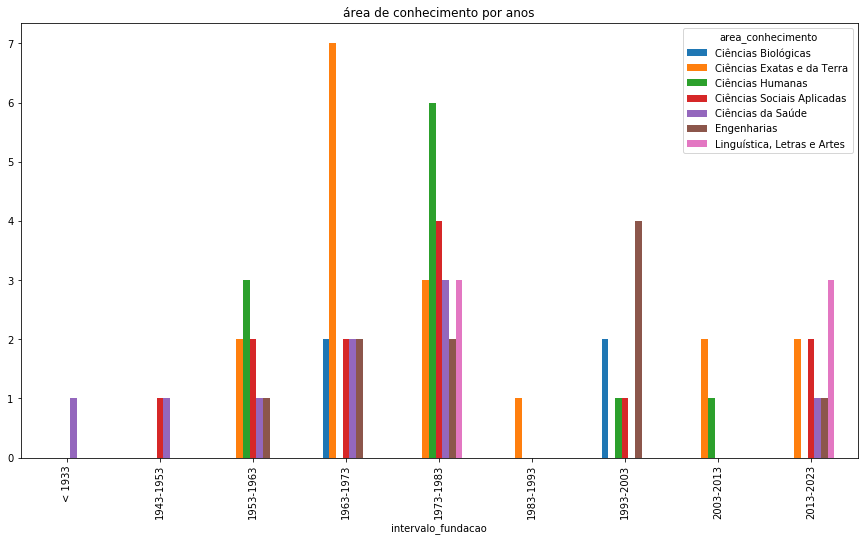

In [160]:
# Dados dos gráficos
fig, ax = plt.subplots(figsize=(15,8))
plt.title("áreas de conhecimento por anos")

# Exibir gráficos
graph_cac['count'].plot(kind='bar', ax=ax)